# Cleaning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data = pd.read_csv("data.csv")

In [4]:
data.isnull().sum()

country                            0
year                               0
iso_code                        8341
population                      8563
gdp                            33494
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 79, dtype: int64

In [5]:
null_percentage = (data.isnull().sum() / len(data)) * 100

In [6]:
columns_to_drop = null_percentage[null_percentage > 80].index

In [7]:
data.drop(columns=columns_to_drop, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [9]:
#For numerical columns, you can fill missing values with mean or median
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 48058 non-null  float64
 4   gdp                                        48058 non-null  float64
 5   cement_co2                                 48058 non-null  float64
 6   cement_co2_per_capita                      48058 non-null  float64
 7   co2                                        48058 non-null  float64
 8   co2_growth_abs                             48058 non-null  float64
 9   co2_growth_prct                            48058 non-null  float64
 10  co2_including_luc     

In [11]:
# For categorical columns, fill missing values with mode
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   48058 non-null  object 
 3   population                                 48058 non-null  float64
 4   gdp                                        48058 non-null  float64
 5   cement_co2                                 48058 non-null  float64
 6   cement_co2_per_capita                      48058 non-null  float64
 7   co2                                        48058 non-null  float64
 8   co2_growth_abs                             48058 non-null  float64
 9   co2_growth_prct                            48058 non-null  float64
 10  co2_including_luc     

In [13]:
data.isnull().sum()

country                                      0
year                                         0
iso_code                                     0
population                                   0
gdp                                          0
cement_co2                                   0
cement_co2_per_capita                        0
co2                                          0
co2_growth_abs                               0
co2_growth_prct                              0
co2_including_luc                            0
co2_including_luc_growth_abs                 0
co2_including_luc_growth_prct                0
co2_including_luc_per_capita                 0
co2_including_luc_per_gdp                    0
co2_per_capita                               0
co2_per_gdp                                  0
co2_per_unit_energy                          0
coal_co2                                     0
coal_co2_per_capita                          0
cumulative_cement_co2                        0
cumulative_co

In [14]:
# Convert 'year' column to datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

In [15]:
numeric_columns = data.select_dtypes(include=['float64']).columns
z_scores = (data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std()
outliers = (z_scores > 3) | (z_scores < -3)
data[numeric_columns][outliers] = data[numeric_columns][outliers].fillna(data[numeric_columns].median())

/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gn/T/ipykernel_96711/2750928139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns][outliers] = data[numeric_columns][outliers].fillna(data[numeric_columns].median())
/var/folders/tz/3gc62l0518x3dtgsh9grl8540000gn/T/ipykernel_96711/2750928139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns][outliers] = data[numeric_columns][outliers].fillna(data[numeric_columns].median())


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 59 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   country                                    48058 non-null  object        
 1   year                                       48058 non-null  datetime64[ns]
 2   iso_code                                   48058 non-null  object        
 3   population                                 48058 non-null  float64       
 4   gdp                                        48058 non-null  float64       
 5   cement_co2                                 48058 non-null  float64       
 6   cement_co2_per_capita                      48058 non-null  float64       
 7   co2                                        48058 non-null  float64       
 8   co2_growth_abs                             48058 non-null  float64       
 9   co2_growth_prct  

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Normalize Numerical Data
scaler = StandardScaler()
data[data.select_dtypes(include=['float64']).columns] = scaler.fit_transform(data.select_dtypes(include=['float64']))

In [18]:
data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1850-01-01,AFG,-0.156264,-0.062998,-0.095624,-0.300075,-0.164466,-0.074578,-0.017155,...,-0.174218,-0.130608,-0.138572,-0.218783,-0.175403,-0.218298,-0.16217,-0.161304,-0.163699,-0.149028
1,Afghanistan,1851-01-01,AFG,-0.156214,-0.062998,-0.095624,-0.300075,-0.164466,-0.074578,-0.017155,...,-0.174218,-0.130608,-0.138572,-0.219113,-0.175403,-0.207145,-0.16217,-0.161304,-0.163699,-0.149028
2,Afghanistan,1852-01-01,AFG,-0.156161,-0.062998,-0.095624,-0.300075,-0.164466,-0.074578,-0.017155,...,-0.174218,-0.130608,-0.138572,-0.219223,-0.175403,-0.207263,-0.16217,-0.161304,-0.163699,-0.149028
3,Afghanistan,1853-01-01,AFG,-0.156104,-0.062998,-0.095624,-0.300075,-0.164466,-0.074578,-0.017155,...,-0.174218,-0.130608,-0.138572,-0.219443,-0.175403,-0.207263,-0.16217,-0.161304,-0.163699,-0.149028
4,Afghanistan,1854-01-01,AFG,-0.156047,-0.062998,-0.095624,-0.300075,-0.164466,-0.074578,-0.017155,...,-0.174218,-0.130608,-0.138572,-0.219553,-0.175403,-0.207382,-0.16217,-0.161304,-0.163699,-0.149028


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("data.csv")  # Replace "your_dataset.csv" with the actual filename

# Select subset of rows with years >= 1970
data = data[data['year'] >= 1970]

In [20]:
# Drop irrelevant columns (e.g., 'country', 'iso_code', etc.)
data = data.drop(columns=['country', 'iso_code'])

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

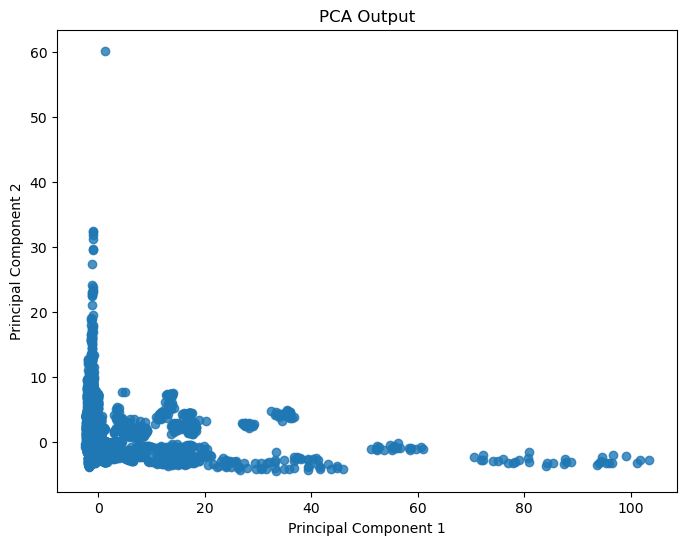

In [21]:
# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.8)
plt.title('PCA Output')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


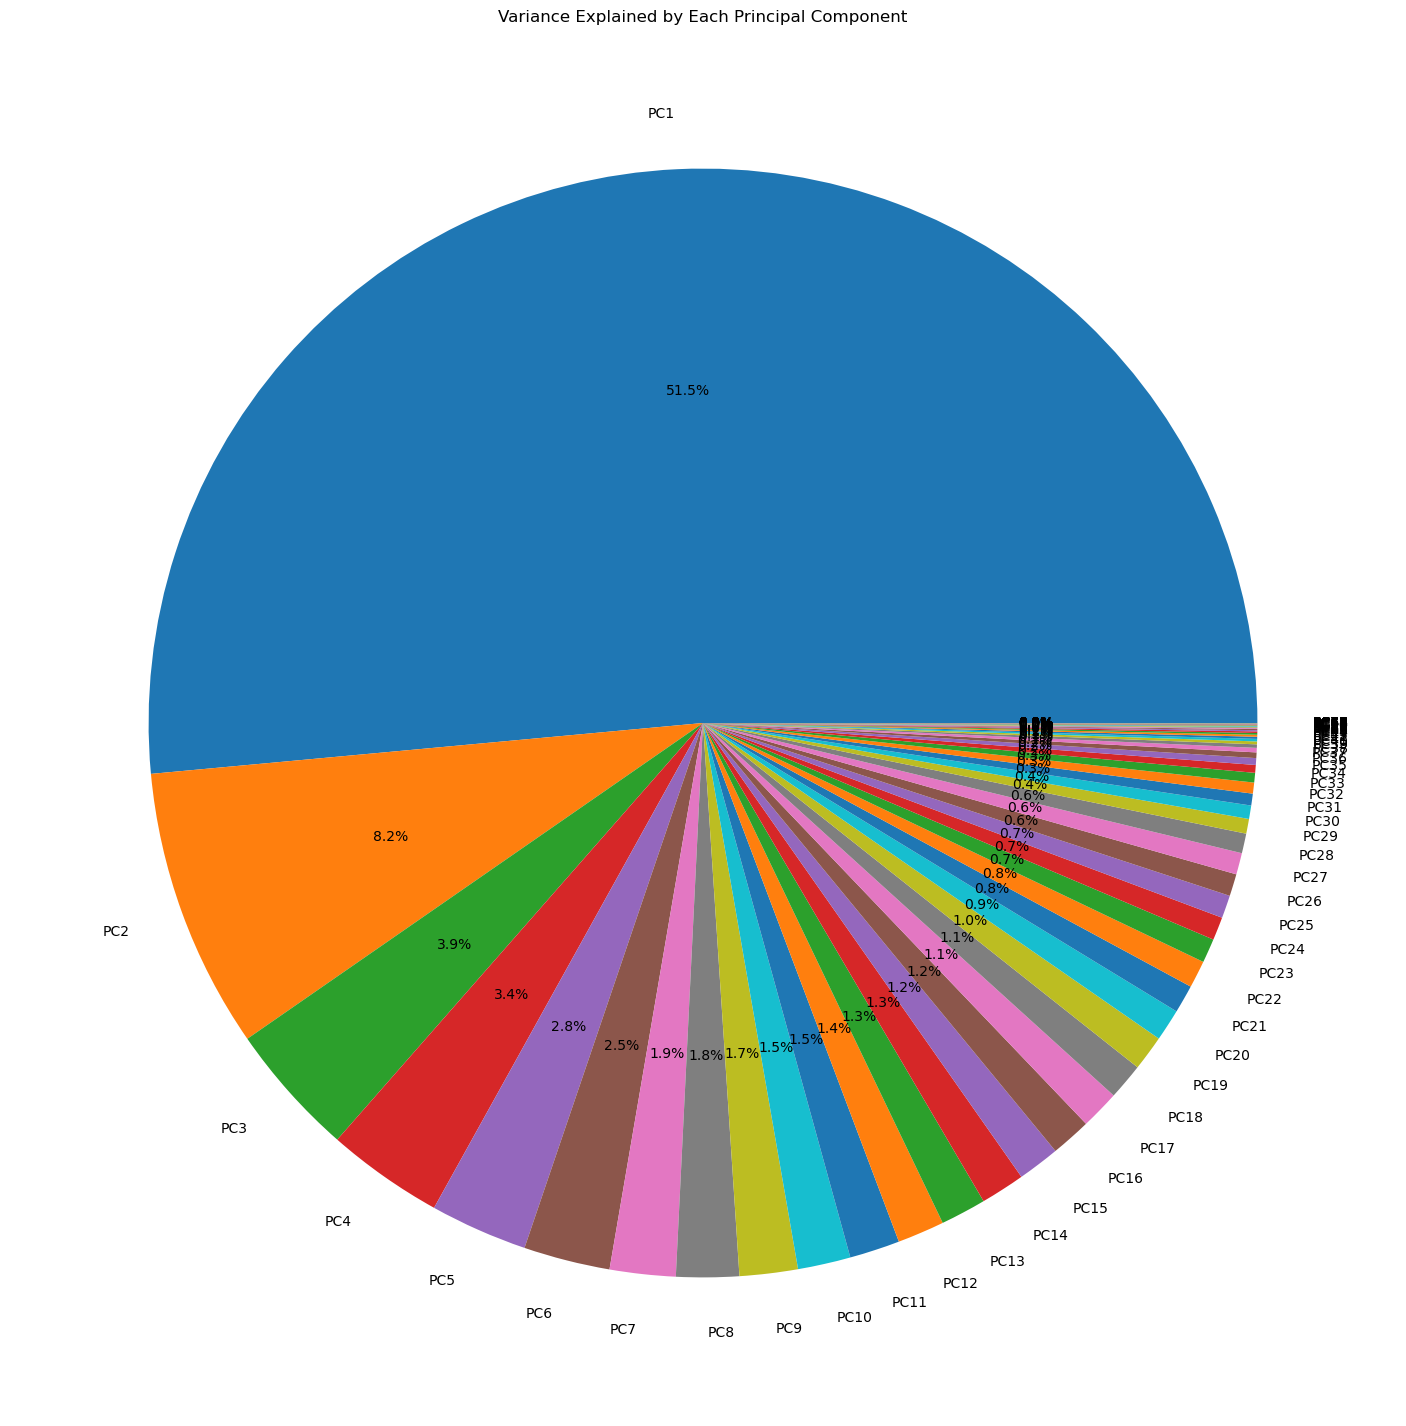

In [22]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot pie chart for variance explained by each component
plt.figure(figsize=(24, 18))
plt.pie(explained_variance_ratios, labels=[f"PC{i+1}" for i in range(len(explained_variance_ratios))], autopct='%1.1f%%')
plt.title('Variance Explained by Each Principal Component')
plt.show()

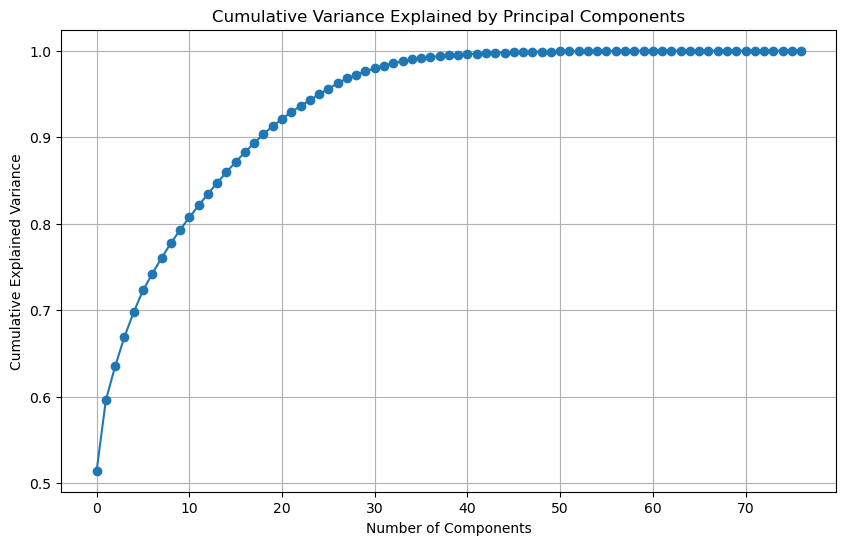

In [23]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Plot line graph for variance explained by each component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratios), marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

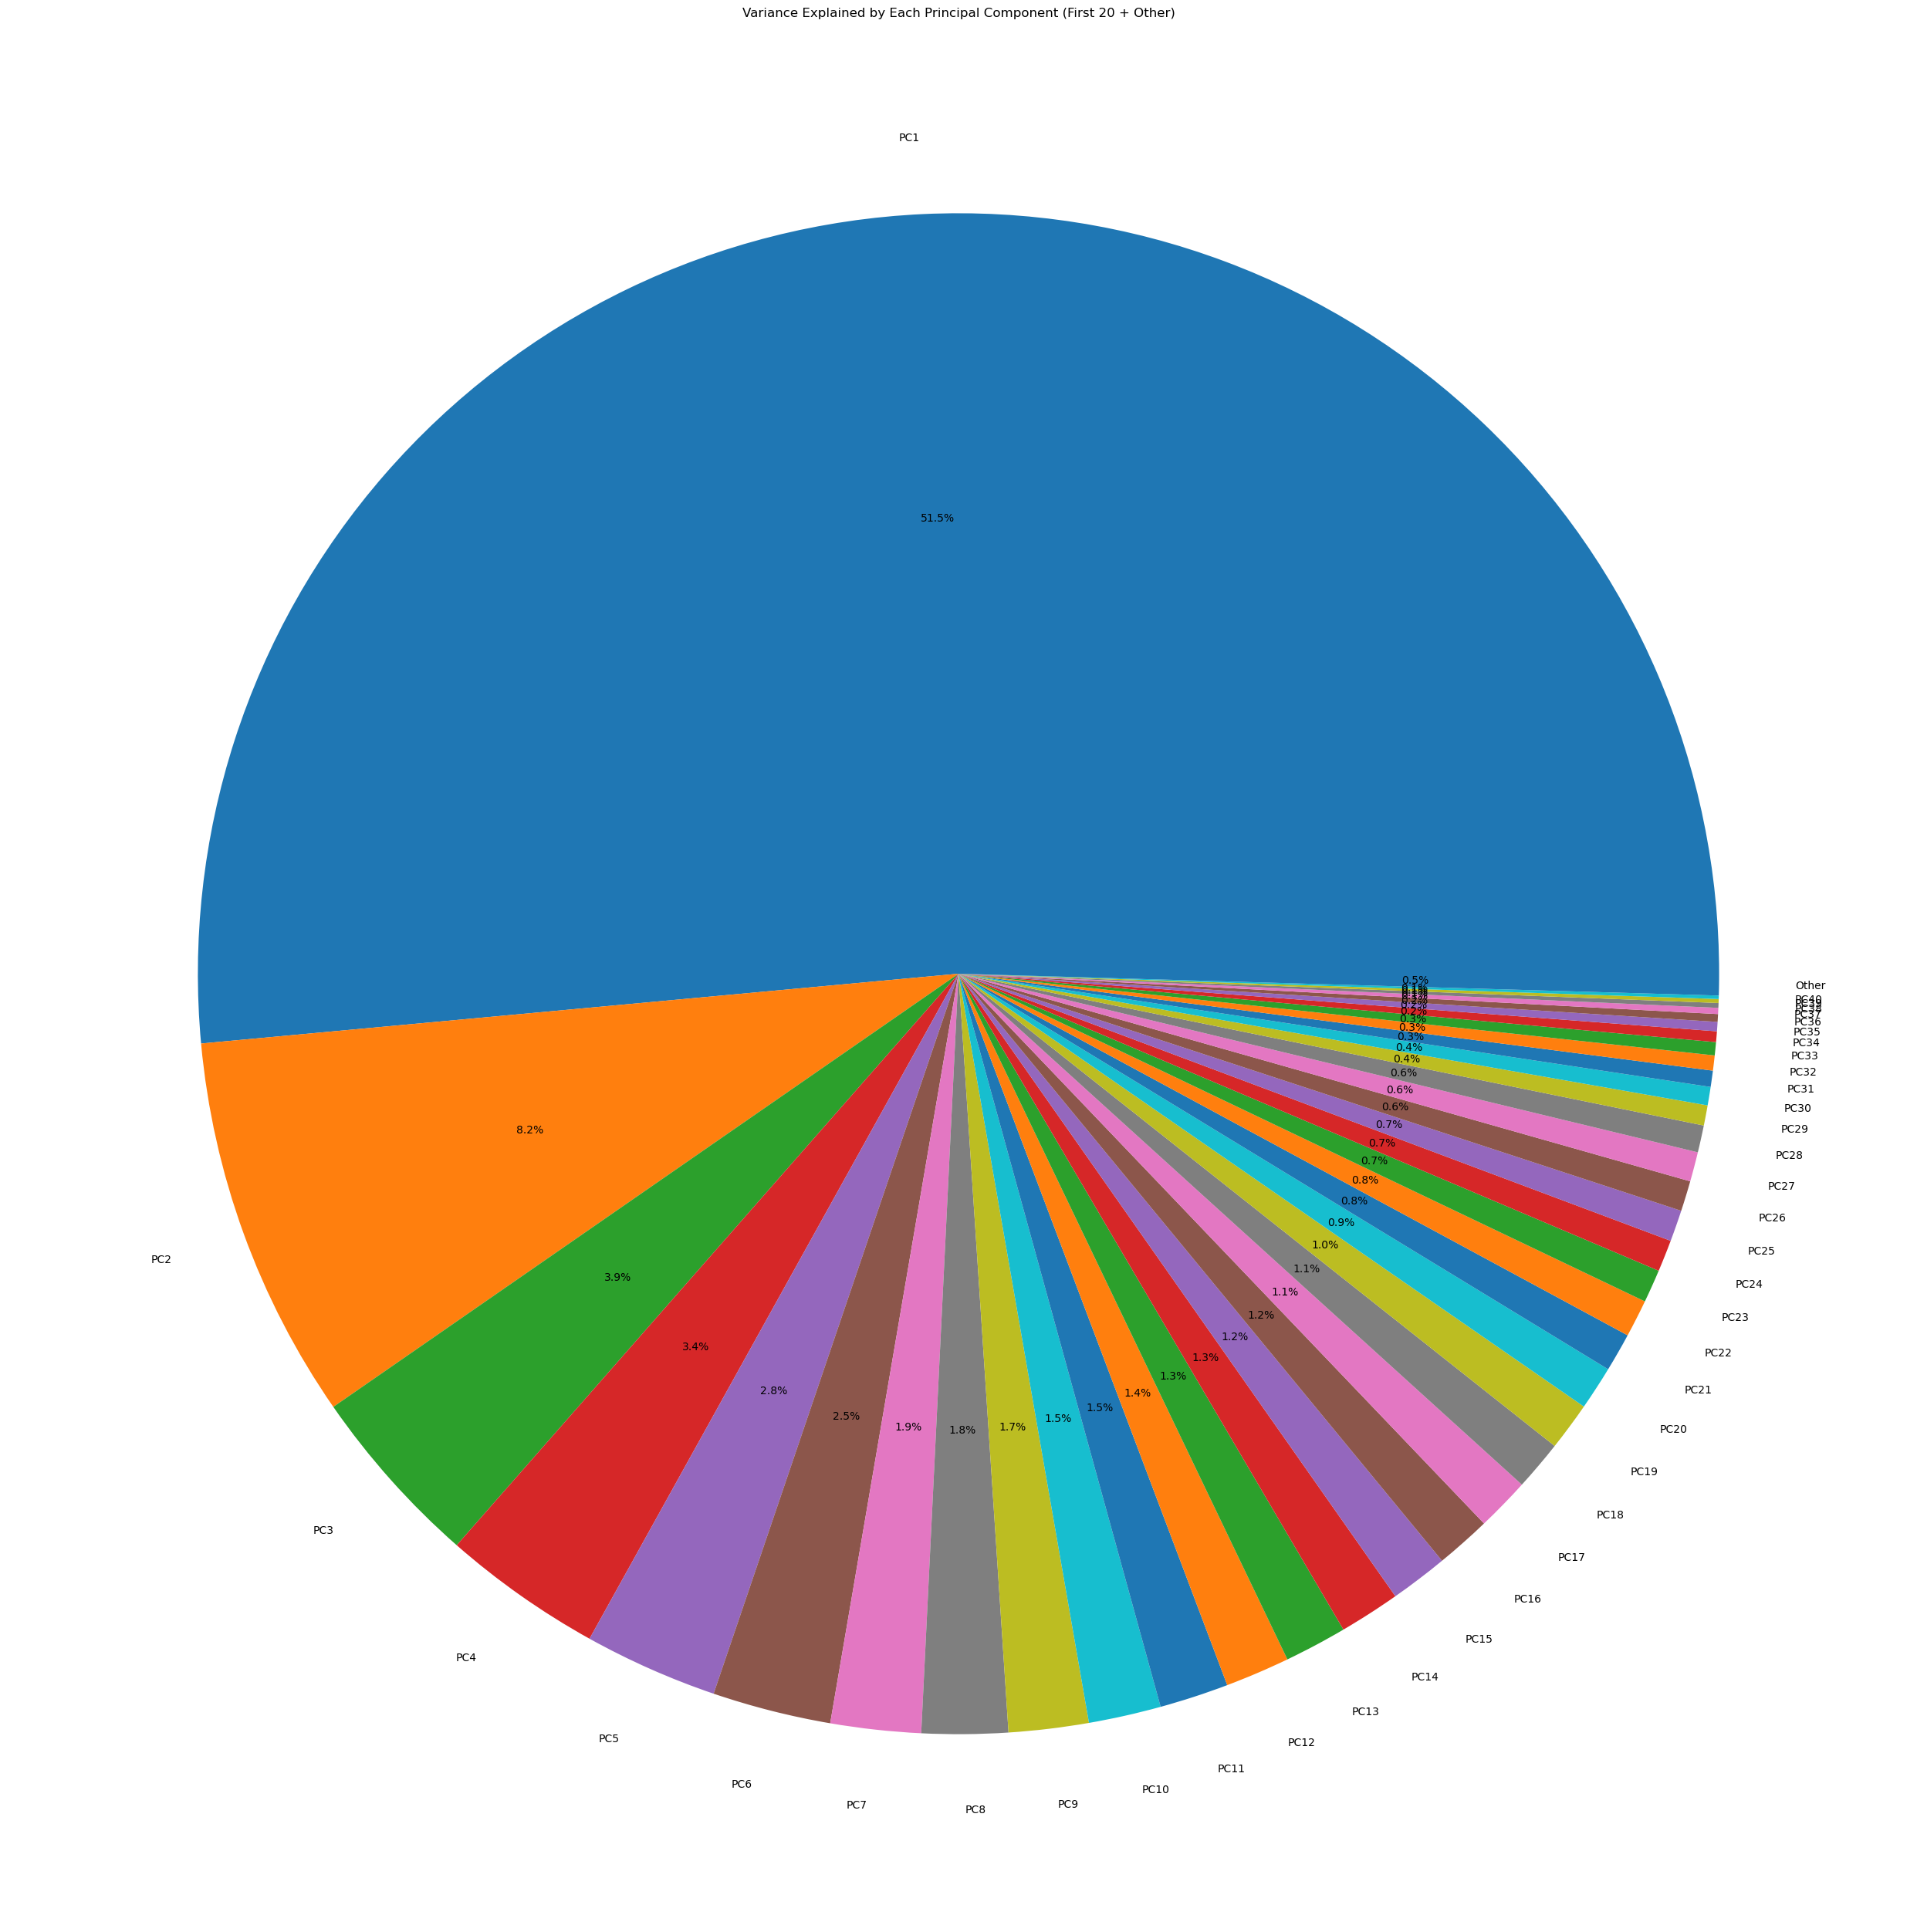

In [24]:
# Get explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# For the first 20 features, use their explained variance ratios
explained_variance_ratios_first_20 = explained_variance_ratios[:40]

# Sum the explained variance ratios for the remaining features and assign it to "Other"
explained_variance_ratio_other = np.sum(explained_variance_ratios[40:])

# Create labels for the pie chart
labels = [f"PC{i+1}" for i in range(40)]
labels.append("Other")

# Create data for the pie chart
ratios = np.append(explained_variance_ratios_first_20, explained_variance_ratio_other)

# Plot pie chart for variance explained by each component
plt.figure(figsize=(32, 32))
plt.pie(ratios, labels=labels, autopct='%1.1f%%')
plt.title('Variance Explained by Each Principal Component (First 20 + Other)')
plt.show()